<h1><center>Dynamic Modeling of Combined Concentrating Solar Tower and Parabolic Trough for
Increased Day-to-Day Performance</center></h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, integrate
import pathlib
import pvlib

# from SolarGeometry_hoy import *
import CombiCSP.SolarGeometry as sgh
from CombiCSP.CSP import *

In [2]:
# constants
hoy = sgh.HOYS_DEFAULT 
IMG_FOLDER  = pathlib.Path("imgs/")
IMG_FOLDER.mkdir(parents=True, exist_ok=True)

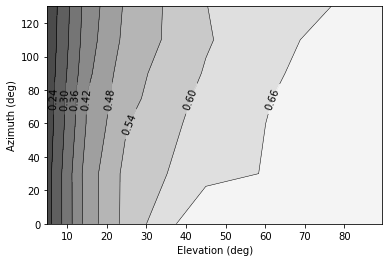

In [3]:
x = [5,15,25,45,65,89.5]
#x = [90 - x1]
y = [0,30,60,75,90,110,130]
Z = np.array([[0.216,0.446,0.560,0.719,0.684,0.683],
[0.215,0.448,0.558,0.640,0.670,0.683],
[0.206,0.425,0.537,0.626,0.671,0.686],
[0.204,0.423,0.522,0.618,0.668,0.672],
[0.199,0.405,0.516,0.605,0.660,0.682],
[0.194,0.392,0.498,0.594,0.655,0.687],
[0.192,0.385,0.491,0.599,0.641,0.681]])

X,Y = np.meshgrid(x,y)

plt.contourf(X, Y, Z, 8, alpha=.75, cmap='gray')
C = plt.contour(X, Y, Z, 8, colors='black', linewidths=.5)
plt.xlabel('Elevation (deg)')
plt.ylabel('Azimuth (deg)')
plt.clabel(C)
plt.show()

#rbf = interpolate.Rbf(X.ravel(), Y.ravel(), Z.ravel(), smooth=0.000001)
#X2,Y2 = np.meshgrid(x,y)
#c3 = contourf(X2, Y2, rbf(X2, Y2))
#C2 = contour(X2, Y2, rbf(X2, Y2), 8, colors='black', linewidth=.5)
#xlabel('Elevation (deg)'), ylabel('Azimuth (deg)')
#clabel(C2)
#show()

In [4]:
# #TODO make it work 

# # def heatmap2d(arr: np.ndarray):
# #     plt.imshow(arr, cmap='viridis')
# #     plt.colorbar()
# #     plt.show()

# heatmap2d(tow_xyz.T)
# heatmap2d(tro_xyz.T)
# heatmap2d(combiNS_xyz.T)
# heatmap2d(combiEW_xyz.T)

In [5]:
# dt_gmt = +2 # time difference between Greenwich Mean Time
# lat = 35 # Crete
# mer = -25 # for Greece check to replace with 15 * dt_gmt
# lon = 24 # Crete 35.2401° N, 24.8093° E [east negative, west positive]
# #lon = -37 # Athens 37.9838° N, 23.7275° E [east negative, west positive]

def ineichen(latitude:float = 35, longitude: float = 24, 
    tz: str = 'Europe/Athens', 
    altitude:float = 400, 
    name = 'Ierapetra' )->pd.DataFrame:
    """_summary_

    Args:
        latitude (float, optional): _description_. Defaults to 35.
        longitude (float, optional): _description_. Defaults to 24.
        tz (str, optional): _description_. Defaults to 'Europe/Athens'.
        altitude (float, optional): _description_. Defaults to 400.
        name (str, optional): _description_. Defaults to 'Ierapetra'.

    Returns:
        pd.DataFrame: a Dataframe containing the following columns with index the hourly data
            ghi:  global horizontal irradiance[W/m^2]
            dni:  direct normal irradiance [W/m^2]
            dhi:  diffuse horizontal irradiance [W/m^2]
    """   
    times = pd.date_range(start='2020-01-01', periods=8760, freq='1H', tz=tz) #end='2020-12-31', 
    solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
    apparent_zenith = solpos['apparent_zenith']
    airmass = pvlib.atmosphere.get_relative_airmass(apparent_zenith)
    pressure = pvlib.atmosphere.alt2pres(altitude)
    airmass = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
    linke_turbidity = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)
    dni_extra = pvlib.irradiance.get_extra_radiation(times)
    return pvlib.clearsky.ineichen(apparent_zenith, airmass, linke_turbidity, altitude, dni_extra)
df_irr = ineichen()

2044098.98
1822865.26


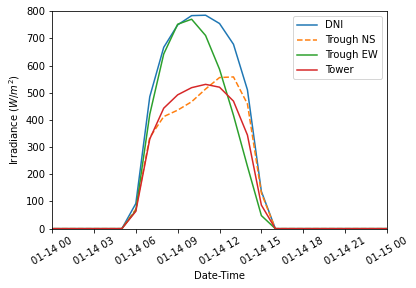

In [6]:

plt.plot(df_irr.dni)
plt.plot(df_irr.dni*costhetai_NS()*IAM_tro(hoy), linestyle='dashed')
plt.plot(df_irr.dni*costhetai_EW()*IAM_tro(hoy))
plt.plot(df_irr.dni*IAM_tow(hoy))

plt.xlim(18275,18276)
plt.ylim(0,800)
plt.xlabel('Date-Time')
plt.ylabel('Irradiance ($W/m^2$)')
tower = solarII(df_irr.dni,1,IAM_tow(hoy),225000,99.3)
trough = di_sst(df_irr.dni,costhetai_NS(),IAM_tro(hoy),Tr, 5.76, 0.07, 18, 25, 1800)
plt.legend(('DNI','Trough NS','Trough EW','Tower','tower','trough'))
plt.xticks(rotation=30)
Ens = integrate.trapz(df_irr.dni*costhetai_NS()*IAM_tro(hoy)).round(2)
Eew = integrate.trapz(df_irr.dni*costhetai_EW()*IAM_tro(hoy)).round(2)
Etow = integrate.trapz(df_irr.dni*IAM_tow(hoy)).round(2)
print(Ens)
print(Eew)
Etow
plt.savefig(IMG_FOLDER/'Jan.png')

2044098.98
1822865.26


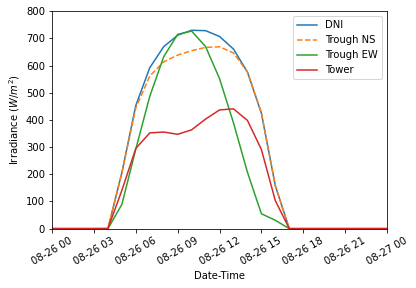

In [7]:

plt.plot(df_irr.dni)
plt.plot(df_irr.dni*costhetai_NS()*IAM_tro(hoy), '--')#linestyle='dashed')
plt.plot(df_irr.dni*costhetai_EW()*IAM_tro(hoy))
plt.plot(df_irr.dni*IAM_tow(hoy))

plt.xlim(18500,18501)
plt.ylim(0,800)
plt.xlabel('Date-Time')
plt.ylabel('Irradiance ($W/m^2$)')
tower = solarII(df_irr.dni,1,IAM_tow(hoy),225000,99.3)
trough = di_sst(df_irr.dni,costhetai_NS(),IAM_tro(hoy),Tr, 5.76, 0.07, 18, 25, 1800)
plt.legend(('DNI','Trough NS','Trough EW','Tower','tower','trough'))
plt.xticks(rotation=30)
Ens = integrate.trapz(df_irr.dni*costhetai_NS()*IAM_tro(hoy)).round(2)
Eew = integrate.trapz(df_irr.dni*costhetai_EW()*IAM_tro(hoy)).round(2)
Etow = integrate.trapz(df_irr.dni*IAM_tow(hoy)).round(2)
print(Ens)
print(Eew)
Etow
plt.savefig(IMG_FOLDER/'Aug.png')

In [8]:
# index = ['Total aperture area $(m^2)$',
#          'Geometrical concentration',
#          'Power (MW)',
#          'Annual energy (MWh)',
#          'Capacity factor',
#          'DPB',
#          'NPV',
#          'IRR',
#          'Cash flows']
# tow_scenaria = pd.DataFrame(np.transpose(tow_scenaria), index=index).round(2)
# #np.savetxt(r'C:\Users\gearn\+MyScripts\Solar\tables\tow.txt', tow_scenaria.iloc[:8].values, fmt='%d')
# tow_scenaria.iloc[:8].to_csv('tow.csv')
# tow_scenaria.iloc[:8]

In [9]:
# trough_scenaria = pd.DataFrame(np.transpose(trough_scenaria), index=index).round(2)
# trough_scenaria.iloc[:8]

In [10]:
# troughew_scenaria = pd.DataFrame(np.transpose(troughew_scenaria), index=index).round(2)
# troughew_scenaria.iloc[:8]

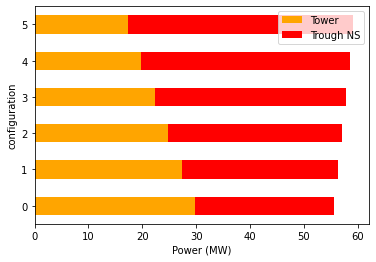

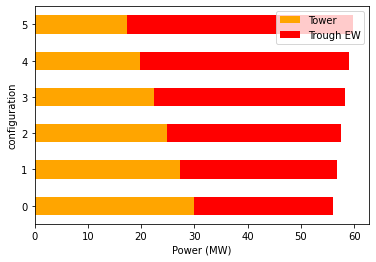

In [11]:
tow = [17.3385,19.8417,22.3449,24.8481,27.3512,29.8544]
trons = [41.8438,38.6251,35.4063,32.1876,28.9688,25.7501]
troew = [42.5302,39.2586,35.9871,32.7155,29.444,26.1724]
index = ['Tower','Trough NS']
df = pd.DataFrame({'Tower':tow[::-1],'Trough NS':trons[::-1]})
ax = df.plot.barh(stacked=True, color = ('orange','r'))
plt.ylabel('configuration')
plt.xlabel('Power (MW)')
plt.savefig(IMG_FOLDER /'Fig4a.png')

df2 = pd.DataFrame({'Tower':tow[::-1],'Trough EW':troew[::-1]})
ax = df2.plot.barh(stacked=True, color = ('orange','r'))
plt.ylabel('configuration')
plt.xlabel('Power (MW)')
plt.savefig(IMG_FOLDER  /'Fig4b.png')

In [ ]:
IMG_FOLDER